In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
Bil_data = pd.read_csv(r"Bilar.csv")

In [166]:
print(Bil_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pris         701 non-null    int64 
 1   Län          701 non-null    object
 2   Bränsle      701 non-null    object
 3   Växellåda    701 non-null    object
 4   Miltal       701 non-null    int64 
 5   Modellår     701 non-null    int64 
 6   Biltyp       701 non-null    object
 7   Drivning     698 non-null    object
 8   Hästkrafter  700 non-null    object
 9   Färg         700 non-null    object
 10  Märke        701 non-null    object
 11  Modell       701 non-null    object
dtypes: int64(3), object(9)
memory usage: 65.8+ KB
None


In [167]:
Bil_data.head()

,Pris,Län,Bränsle,Växellåda,Miltal,Modellår,Biltyp,Drivning,Hästkrafter,Färg,Märke,Modell
0,174800,Stockholm,Bensin,Manuell,4561,2018,Halvkombi,Tvåhjulsdriven,127,Vit,Honda,Civic
1,149800,Stockholm,Diesel,Manuell,8961,2016,SUV,Tvåhjulsdriven,111,Vit,Nissan,Qashqai
2,409900,Stockholm,El,Automat,2825,2021,SUV,Tvåhjulsdriven,207,Vit,Volkswagen,ID.4
3,239900,Stockholm,Bensin,Automat,7188,2021,Halvkombi,Tvåhjulsdriven,151,Vit,Volkswagen,Golf
4,339900,Stockholm,Bensin,Automat,5583,2022,Kombi,Tvåhjulsdriven,151,Vit,Volkswagen,Touran


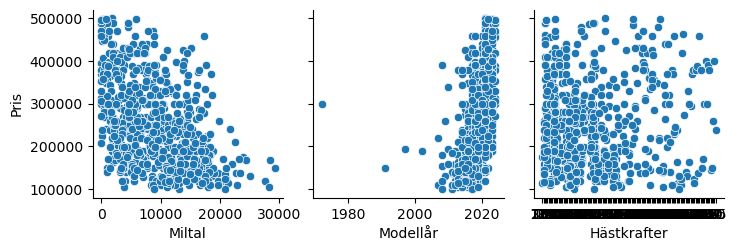

In [168]:
# Scatterplot för att undersöka sambandet mellan variabl

sns.pairplot(Bil_data, x_vars=['Miltal', 'Modellår', 'Hästkrafter'], 
    y_vars='Pris', kind='scatter')
plt.show()

C:\Users\Nices\AppData\Local\Temp\ipykernel_1940\4053087080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Bil_data.corr()


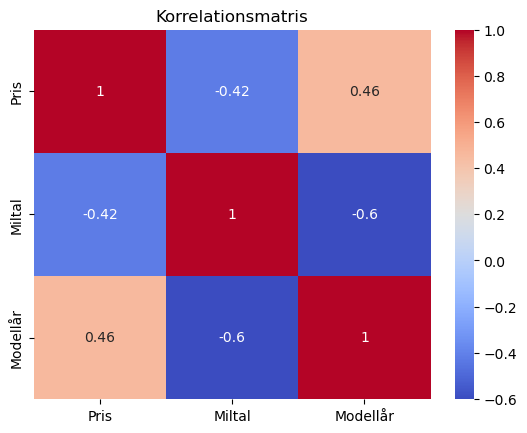

In [169]:
correlation_matrix = Bil_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Korrelationsmatris")
plt.show()

In [170]:
# Definiera prediktorer (X) och målvariabel (y)
X = Bil_data[["Modellår", "Miltal"]]
y = Bil_data["Pris"]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
model_RFR = RandomForestRegressor(n_estimators=100, random_state=42)

In [173]:
model_RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [174]:
predictions = rf_model.predict(X_test)

In [175]:
# Utvärdera modellen genom att beräkna Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Root Mean Squared Error för Random Forest:", rf_rmse)

Root Mean Squared Error för Random Forest: 86574.8288244422


In [176]:
model_LR = LinearRegression()

In [177]:
model_LR.fit(X_train, y_train)

LinearRegression()

In [178]:
predictions = model_LR.predict(X_test)

In [179]:
#Beräkna MSE
mse = mean_squared_error(y_test, predictions)
#Beräkna RMSE 
rmse = np.sqrt(mse)

In [180]:
print("RMSE:", rmse)

RMSE: 82946.83796811712


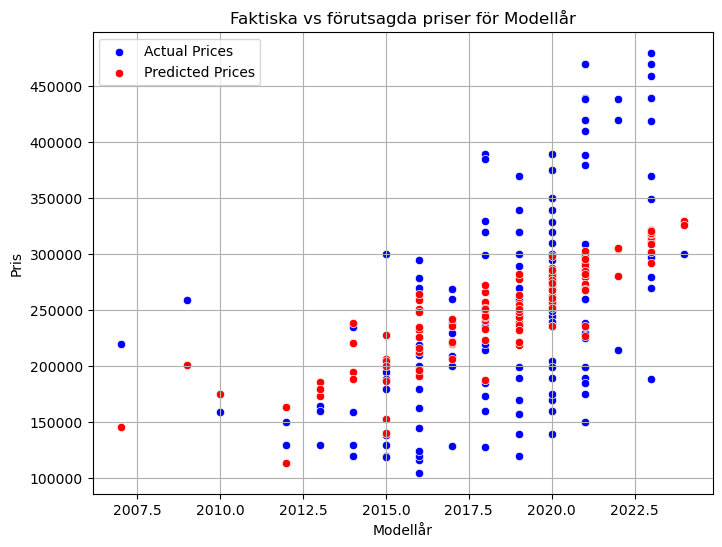

In [181]:
# Scatterplot för att undersöka sambandet mellan Modellår och Pris
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["Modellår"], y=y_test, color='blue', label='Actual Prices')
sns.scatterplot(x=X_test["Modellår"], y=predictions, color='red', label='Predicted Prices')
plt.xlabel("Modellår")
plt.ylabel("Pris")
plt.title("Faktiska vs förutsagda priser för Modellår")
plt.legend()
plt.grid(True) 
plt.show()